/var/folders/7c/wbc1mxhj195dq_7p0xd_rfw80000gp/T/ipykernel_27478/2406615205.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')


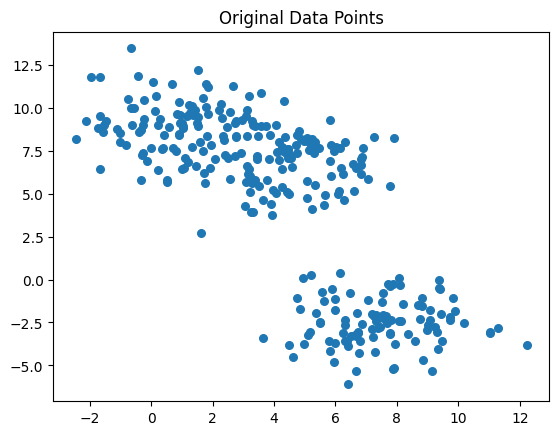

/opt/miniconda3/envs/ubc_ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


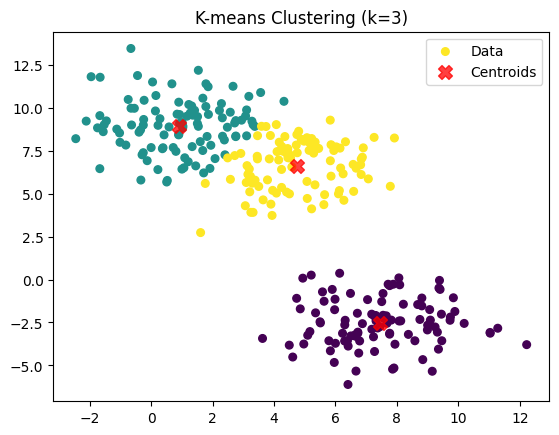

Centroids:
 [[ 7.4584017  -2.51875316]
 [ 0.90598969  8.95397427]
 [ 4.73502527  6.62884165]]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# =========================
# 1. Generate synthetic 2D data (3 clusters)
# =========================
n_samples = 300
n_clusters = 3
seed = 32
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, 
                  random_state=seed, cluster_std=1.5)

# Plot original data
plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title("Original Data Points")
plt.show()

# =========================
# 2. Apply K-means clustering
# =========================
k = 3
kmeans = KMeans(n_clusters=k, random_state=seed)
kmeans.fit(X)

# Get cluster labels & centroids
y_kmeans = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# =========================
# 3. Plot clustered points with centroids
# =========================
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis', label='Data')
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='red', s=100, marker='X', alpha=0.75, label='Centroids')
plt.title(f"K-means Clustering (k={k})")
plt.legend()
plt.show()

# =========================
# 4. Print centroids
# =========================
print("Centroids:\n", centroids)


/opt/miniconda3/envs/ubc_ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


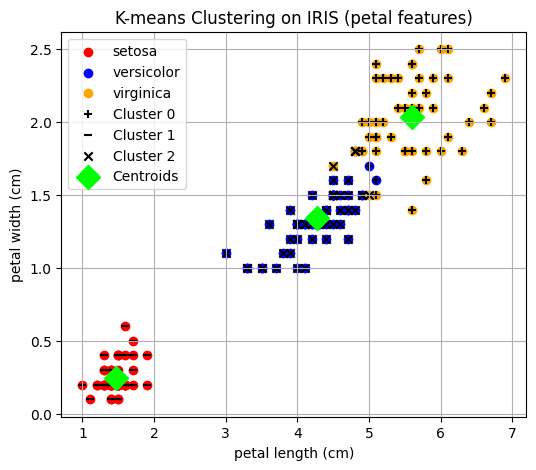

Final Centroids:
 [[5.59583333 2.0375    ]
 [1.462      0.246     ]
 [4.26923077 1.34230769]]


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets

# =========================
# 1. Load IRIS dataset
# =========================
iris = datasets.load_iris()
y = iris.target                    # true labels (not used for clustering)
X = iris.data[:, 2:4]              # use petal length & width only

# =========================
# 2. Plot original data with true labels (for comparison)
# =========================
plt.figure(figsize=(6,5))
plt.scatter(X[y==0, 0], X[y==0, 1], c='r', label='setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], c='b', label='versicolor')
plt.scatter(X[y==2, 0], X[y==2, 1], c='orange', label='virginica')
plt.grid(True)
plt.legend()
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
# plt.title("Original IRIS (True Labels)")
# plt.show()

# =========================
# 3. Run K-means clustering
# =========================
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# =========================
# 4. Plot clustering result
# =========================
# plt.figure(figsize=(6,5))
plt.scatter(X[labels==0, 0], X[labels==0, 1], marker='+', c='k', label='Cluster 0')
plt.scatter(X[labels==1, 0], X[labels==1, 1], marker='_', c='k', label='Cluster 1')
plt.scatter(X[labels==2, 0], X[labels==2, 1], marker='x', c='k', label='Cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', c='lime', s=150, label='Centroids')

plt.grid(True)
plt.legend()
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title("K-means Clustering on IRIS (petal features)")
plt.show()

# =========================
# 5. Print centroids
# =========================
print("Final Centroids:\n", centroids)


/opt/miniconda3/envs/ubc_ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/ubc_ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/ubc_ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/ubc_ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

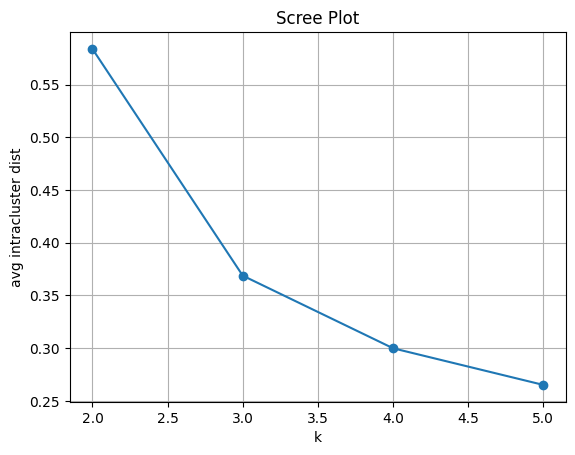

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 假设你之前已经有 X (e.g. from iris or make_blobs)
# 如果没有可以把前面生成 X 的代码一起复制

K_max = 6
avg_dist = []

for k in range(2, K_max):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    centroids = kmeans.cluster_centers_

    # 计算平均簇内距离
    d = 0
    for i in range(X.shape[0]):
        d += np.sqrt(np.sum((X[i, :] - centroids[labels[i], :]) ** 2))
    avg_dist.append(d / X.shape[0])

# 画 scree plot
plt.plot(range(2, K_max), avg_dist, marker='o')
plt.xlabel('k')
plt.ylabel('avg intracluster dist')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


/opt/miniconda3/envs/ubc_ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/ubc_ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/ubc_ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/ubc_ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

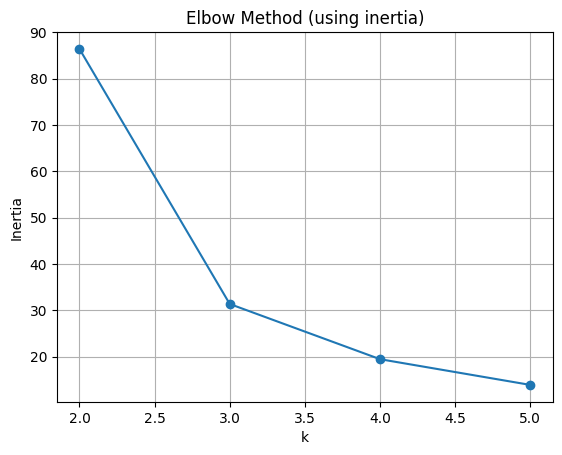

In [10]:
inertias = []
for k in range(2, K_max):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)  # sum of squared distances

plt.plot(range(2, K_max), inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method (using inertia)')
plt.grid(True)
plt.show()
